In [22]:
#Now linear regression with multiple variable

import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\user\Documents\Machine learning\machine-learning-ex1\ex1\ex1data2.txt",names = ['House Size(Square feet)',"#Bedrooms",'Price'])
df

,House Size(Square feet),#Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [23]:
#Normalizing Feature

x1 = np.array(df['House Size(Square feet)'])
x2 = np.array(df['#Bedrooms'])
y = np.array(df['Price'])


x1mean = x1.mean()
x1std = x1.std()

x2mean = x2.mean()
x2std = x2.std()

print (x1mean)
print(x2.mean())

x1 = [(x1[i]-x1mean)/x1std for i in range(len(x1))]
x2 = [(x2[i]-x2mean)/x2std for i in range(len(x2))]
print(x1std)
print(x2std)

2000.6808510638298
3.1702127659574466
786.2026187430467
0.7528428090618781


In [24]:
#COST AND GRADIENT FUNCTION


import numpy as np
#print(len(x))
lst = [1 for i in range(len(x1))]

#creating the matrix X by adding column of ones
X = np.array([lst,x1,x2])
X = X.transpose()
print(X)

#creating the matrix of y as Y
Y = np.array(y)
Y = Y.transpose()
Y = Y.reshape(len(y),1)
print(Y)


[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01]
 [ 1.00000000e+00  7.73743478e-01  1.10220517e+00]
 [ 1.00000000e+00  1.31050078e+

In [25]:
#Creating Theta
theta = np.zeros((3,1))
print(theta.shape)

(3, 1)


In [26]:
#given values
iterations = 400
alpha = 0.01

In [27]:
#Computing hypothesis

def hypothesis(theta,X):
    return X.dot(theta)

In [28]:
#partial derivative of cost function of theta[0] multipy by (alpha/m)
def pdJtheta0(alpha,m,Y,theta,X):
    return ((((hypothesis(theta,X)-Y).sum())*alpha)/m)

#partial derivative of cost function of theta[1] multipy by (alpha/m)
def pdJtheta1(alpha,m,Y,theta,X):
    temp = hypothesis(theta,X)-Y
    tempx = np.array(x1).reshape(1,len(x1))
    return ((tempx.dot(temp))*(alpha/m))

def pdJtheta2(alpha,m,Y,theta,X):
    temp = hypothesis(theta,X)-Y
    tempx = np.array(x2).reshape(1,len(x1))
    return ((tempx.dot(temp))*(alpha/m))


#print (pdJtheta1(alpha,len(x),Y,theta,X))

In [29]:
#computing the cost 
def computeCost(theta):
    mat = X.dot(theta) - Y

    sum = 0
    for ele in range(len(x1)):
        sum+= mat[ele]**2
    
    return (sum/(2*len(x1)))

print(computeCost(theta))

[6.55915481e+10]


In [30]:
#For storing cost for each theta[0] and theta[1]
allTheta0 = []
allTheta0.extend(theta[0])

allTheta1 = []
allTheta1.extend(theta[1])

allTheta2 = []
allTheta1.extend(theta[2])


allCost = []
allCost.extend(computeCost(theta))


#performing the iterations in gradient descent
def GradientDescent(iterations):
    for i in range(iterations):
        temp0 = theta[0]-pdJtheta0(alpha,len(x1),Y,theta,X)
        temp1 = theta[1]-pdJtheta1(alpha,len(x1),Y,theta,X)
        temp2 = theta[2]-pdJtheta2(alpha,len(x1),Y,theta,X)

        theta[0] = temp0
        theta[1] = temp1
        theta[2] = temp2

        allTheta0.extend(temp0)
        allTheta1.extend(temp1)
        allTheta1.extend(temp2)
        allCost.extend(computeCost(theta))

        print(theta,computeCost(theta))
    
GradientDescent(iterations)

[[3404.12659574]
 [1057.64133493]
 [ 547.08821756]] [6.42977763e+10]
[[6774.21192553]
 [2101.64274191]
 [1082.78310833]] [6.30310183e+10]
[[10110.59640202]
 [ 3132.20441912]
 [ 1607.2749847 ]] [6.17906942e+10]
[[13413.61703375]
 [ 4149.52349706]
 [ 2120.75113489]] [6.05762369e+10]
[[16683.60745915]
 [ 5153.79408617]
 [ 2623.39587038]] [5.93870917e+10]
[[19920.89798031]
 [ 6145.20732373]
 [ 3115.39057257]] [5.82227165e+10]
[[23125.81559625]
 [ 7123.95141992]
 [ 3596.91373875]] [5.70825809e+10]
[[26298.68403603]
 [ 8090.21170335]
 [ 4068.14102732]] [5.59661664e+10]
[[29439.82379141]
 [ 9044.17066566]
 [ 4529.2453023 ]] [5.48729661e+10]
[[32549.55214924]
 [ 9986.00800564]
 [ 4980.39667721]] [5.3802484e+10]
[[35628.1832235 ]
 [10915.90067247]
 [ 5421.76255814]] [5.27542352e+10]
[[38676.02798701]
 [11834.02290845]
 [ 5853.50768629]] [5.17277455e+10]
[[41693.39430288]
 [12740.54629095]
 [ 6275.79417975]] [5.07225512e+10]
[[44680.5869556 ]
 [13635.63977375]
 [ 6688.78157463]] [4.97381986e+10]

[[261142.64842196]
 [ 73579.16820364]
 [ 18766.04920903]] [5.64054721e+09]
[[261935.34853348]
 [ 73795.93413541]
 [ 18713.45772333]] [5.57306721e+09]
[[262720.12164389]
 [ 74010.82690293]
 [ 18660.17833437]] [5.5069046e+09]
[[263497.0470232 ]
 [ 74223.86908989]
 [ 18606.22841027]] [5.44203306e+09]
[[264266.20314871]
 [ 74435.08295686]
 [ 18551.62501903]] [5.3784268e+09]
[[265027.66771297]
 [ 74644.49044624]
 [ 18496.38493332]] [5.31606056e+09]
[[265781.51763158]
 [ 74852.11318709]
 [ 18440.5246352 ]] [5.2549096e+09]
[[266527.82905101]
 [ 75057.97249988]
 [ 18384.0603208 ]] [5.19494966e+09]
[[267266.67735625]
 [ 75262.08940119]
 [ 18327.00790491]] [5.136157e+09]
[[267998.13717843]
 [ 75464.4846083 ]
 [ 18269.38302548]] [5.07850833e+09]
[[268722.28240239]
 [ 75665.17854377]
 [ 18211.20104805]] [5.02198087e+09]
[[269439.18617411]
 [ 75864.19133987]
 [ 18152.47707018]] [4.96655227e+09]
[[270148.92090811]
 [ 76061.54284303]
 [ 18093.2259257 ]] [4.91220064e+09]
[[270851.55829478]
 [ 76257.25

[[314951.04681152]
 [ 89962.69376774]
 [ 11126.01893733]] [2.5208112e+09]
[[315205.66293915]
 [ 90058.4061078 ]
 [ 11058.08538428]] [2.51298634e+09]
[[315457.7329055 ]
 [ 90153.54173007]
 [ 10990.29520904]] [2.50530277e+09]
[[315707.28217219]
 [ 90248.10559886]
 [ 10922.65020727]] [2.49775778e+09]
[[315954.33594621]
 [ 90342.1026188 ]
 [ 10855.15212887]] [2.49034874e+09]
[[316198.9191825 ]
 [ 90435.53763564]
 [ 10787.80267877]] [2.48307306e+09]
[[316441.05658642]
 [ 90528.41543714]
 [ 10720.60351771]] [2.4759282e+09]
[[316680.7726163 ]
 [ 90620.74075389]
 [ 10653.55626304]] [2.46891167e+09]
[[316918.09148588]
 [ 90712.51826011]
 [ 10586.66248942]] [2.46202103e+09]
[[317153.03716676]
 [ 90803.75257446]
 [ 10519.9237296 ]] [2.45525388e+09]
[[317385.63339084]
 [ 90894.44826084]
 [ 10453.34147513]] [2.44860789e+09]
[[317615.90365268]
 [ 90984.60982914]
 [ 10386.91717712]] [2.44208075e+09]
[[317843.8712119 ]
 [ 91074.24173604]
 [ 10320.65224687]] [2.43567021e+09]
[[318069.55909552]
 [ 91163

[[333790.4642716 ]
 [ 99041.67407797]
 [  3611.19056836]] [2.11188853e+09]
[[333856.68622462]
 [ 99088.67718925]
 [  3567.56598677]] [2.11104185e+09]
[[333922.24595812]
 [ 99135.45455277]
 [  3524.11444899]] [2.11020748e+09]
[[333987.15009429]
 [ 99182.00745701]
 [  3480.83548869]] [2.1093852e+09]
[[334051.40518909]
 [ 99228.3371802 ]
 [  3437.728637  ]] [2.10857481e+09]
[[334115.01773294]
 [ 99274.44499038]
 [  3394.79342257]] [2.10777612e+09]
[[334177.99415136]
 [ 99320.33214558]
 [  3352.02937167]] [2.10698892e+09]
[[334240.34080559]
 [ 99365.99989389]
 [  3309.43600826]] [2.10621304e+09]
[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]] [2.10544829e+09]


In [31]:
#final theta and cost

print(theta)

print(computeCost(theta))

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]
[2.10544829e+09]


In [32]:
#computing the cost of 1650 square feet and 3 bedrooms
p=(1650-2000.6808510638298)/x1std
q=(3-x2mean)/x2std

print((np.array([1,p,q])).dot(theta))



[289221.54737122]


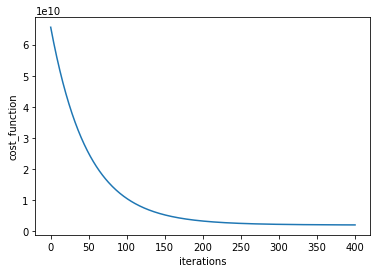

In [33]:
#Plotting...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xs = range(iterations+1)

plt.xlabel('iterations')
plt.ylabel('cost_function')
#plt.plot(x,y,'rx')
plt.plot(xs,allCost)
plt.show()
